In [1]:
# Необходимые библиотеки
from tensorflow.python.keras.datasets import mnist, cifar10
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.python.keras.layers import Dropout, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.python.keras import utils
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Сверточная нейронная сеть

**Загружаем набор данных**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Список с названиями классов**

In [3]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**Просматриваем примеры изображений**

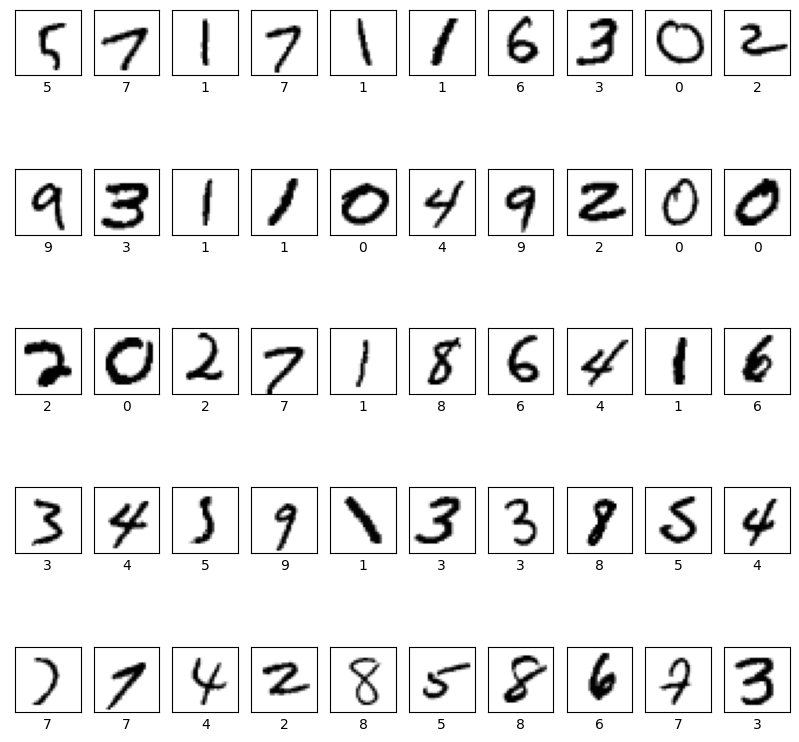

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [6]:
x_train = x_train / 255 
x_test = x_test / 255 

**Преобразуем метки в формат one hot encoding**

In [7]:
y_train = utils.to_categorical(y_train, 10)

In [8]:
y_test = utils.to_categorical(y_test, 10)

**Создаем последовательную модель**

In [9]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Компилируем сеть**

In [10]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"]) 

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [11]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 29us/sample - loss: 1.4322 - acc: 0.6811 - val_loss: 0.8753 - val_acc: 0.8430
Epoch 2/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.7327 - acc: 0.8434 - val_loss: 0.5781 - val_acc: 0.8720
Epoch 3/100
48000/48000 [==============================] - 1s 28us/sample - loss: 0.5538 - acc: 0.8687 - val_loss: 0.4722 - val_acc: 0.8869
Epoch 4/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.4751 - acc: 0.8816 - val_loss: 0.4180 - val_acc: 0.8972
Epoch 5/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.4299 - acc: 0.8890 - val_loss: 0.3849 - val_acc: 0.9029
Epoch 6/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.3998 - acc: 0.8946 - val_loss: 0.3623 - val_acc: 0.9070
Epoch 7/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3778 - acc: 0.8989 - val_l

## Сохраняем нейронную сеть для последующего использования

In [12]:
model.save('mnist_dense.h5')

## Оценка качества обучения

In [13]:
scores = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.1277 - acc: 0.9636


In [14]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 96.36


## Используем сеть для распознавания рукописных цифр

In [15]:
n_rec = 96

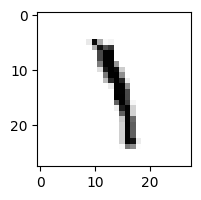

In [16]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [17]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

In [18]:
prediction = model.predict(x)

In [19]:
# Результат распознавания
prediction = np.argmax(prediction[0])
print("Название класса:", prediction)

Название класса: 1


In [20]:
# Правильный ответ
label = np.argmax(y_test[n_rec])
print("Название класса:", label)

Название класса: 1


## Загружаем свои картинки

**Приложенный архив**

In [21]:
img_path = ['lab6/0.jpg', 'lab6/1.jpg', 'lab6/2.jpg', 'lab6/3.jpg', 'lab6/4.jpg', 'lab6/5.jpg', 'lab6/6.jpg', 'lab6/7.jpg', 'lab6/8.jpg', 'lab6/9.jpg']
images = []
for i in img_path:
        img = image.load_img(i, target_size=(28, 28), color_mode = "grayscale")
        img_copy = img.copy()
        images.append(img_copy)

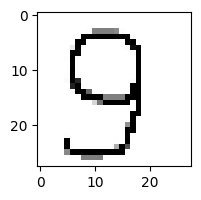

In [22]:
plt.figure(figsize=(2,2))
plt.imshow(images[9].convert('RGBA'))
plt.show()

In [23]:
# Получение предсказаний
pred = []

for i in images:
    x = image.img_to_array(i)
    x = x.reshape(1, 784)
    # Нормализация
    x = 255 - x
    x /= 255
    prediction = model.predict(x)
    pred.append(np.argmax(prediction))

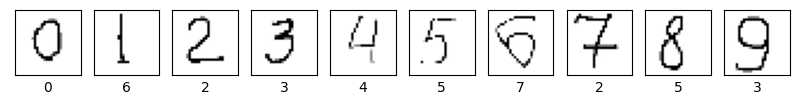

In [24]:
# Отображение результата
plt.figure(figsize=(10,10))
for k in range(len(pred)):
    plt.subplot(1, 10, k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[k].convert('RGBA'), cmap=plt.cm.binary)
    plt.xlabel(pred[k])

**Свои картинки**

In [25]:
img_path = ['lab6-1/0.jpg', 'lab6-1/1.jpg', 'lab6-1/2.jpg', 'lab6-1/3.jpg', 'lab6-1/4.jpg', 'lab6-1/5.jpg', 'lab6-1/6.jpg', 'lab6-1/7.jpg', 'lab6-1/8.jpg', 'lab6-1/9.jpg']
images = []
for i in img_path:
        img = image.load_img(i, target_size=(28, 28), color_mode = "grayscale")
        img_copy = img.copy()
        images.append(img_copy)

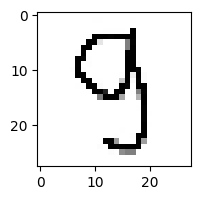

In [26]:
plt.figure(figsize=(2,2))
plt.imshow(images[9].convert('RGBA'))
plt.show()

In [27]:
# Получение предсказаний
pred = []

for i in images:
    x = image.img_to_array(i)
    x = x.reshape(1, 784)
    # Нормализация
    x = 255 - x
    x /= 255
    prediction = model.predict(x)
    pred.append(np.argmax(prediction))

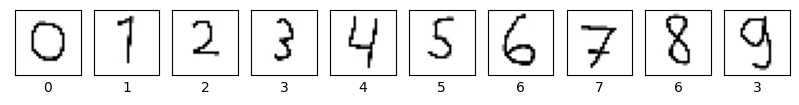

In [28]:
# Отображение результата
plt.figure(figsize=(10,10))
for k in range(len(pred)):
    plt.subplot(1, 10, k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[k].convert('RGBA'), cmap=plt.cm.binary)
    plt.xlabel(pred[k])

### <span style="color:red"> Сложности возникают с: 1, 6, 7, 8, 9.</span>

## 2. Полносвязная нейронная сеть

**Параметры**

In [29]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 10
# Размер изображений
img_rows, img_cols = 28, 28

**Загружаем набор данных**

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Просматриваем пример изображения**

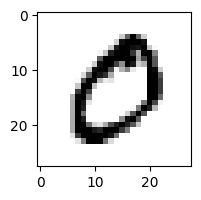

Номер класса: 0


In [31]:
n = 1
plt.figure(figsize=(2,2))
plt.imshow(X_train[n], cmap=plt.cm.binary)
plt.show()
print("Номер класса:", y_train[n])

**Нормализация данных**

In [32]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Преобразуем метки в формат one hot encoding**

In [33]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Создаем последовательную модель**

In [34]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(img_rows, img_cols, 1), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))

# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(128, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

**Компилируем сеть**

In [35]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)         

## Обучаем нейронную сеть

In [36]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 60s 1ms/sample - loss: 0.5967 - acc: 0.8019 - val_loss: 0.0782 - val_acc: 0.9765
Epoch 2/10
54000/54000 [==============================] - 59s 1ms/sample - loss: 0.1577 - acc: 0.9530 - val_loss: 0.0502 - val_acc: 0.9850
Epoch 3/10
54000/54000 [==============================] - 62s 1ms/sample - loss: 0.1138 - acc: 0.9651 - val_loss: 0.0430 - val_acc: 0.9853
Epoch 4/10
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.0948 - acc: 0.9725 - val_loss: 0.0360 - val_acc: 0.9895
Epoch 5/10
54000/54000 [==============================] - 63s 1ms/sample - loss: 0.0810 - acc: 0.9753 - val_loss: 0.0408 - val_acc: 0.9877
Epoch 6/10
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.0717 - acc: 0.9783 - val_loss: 0.0335 - val_acc: 0.9912
Epoch 7/10
54000/54000 [==============================] - 63s 1ms/sample - loss: 0.0671 - acc: 0.9799 - val_loss: 0.0

## Оценка качества обучения

In [37]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 99.32%


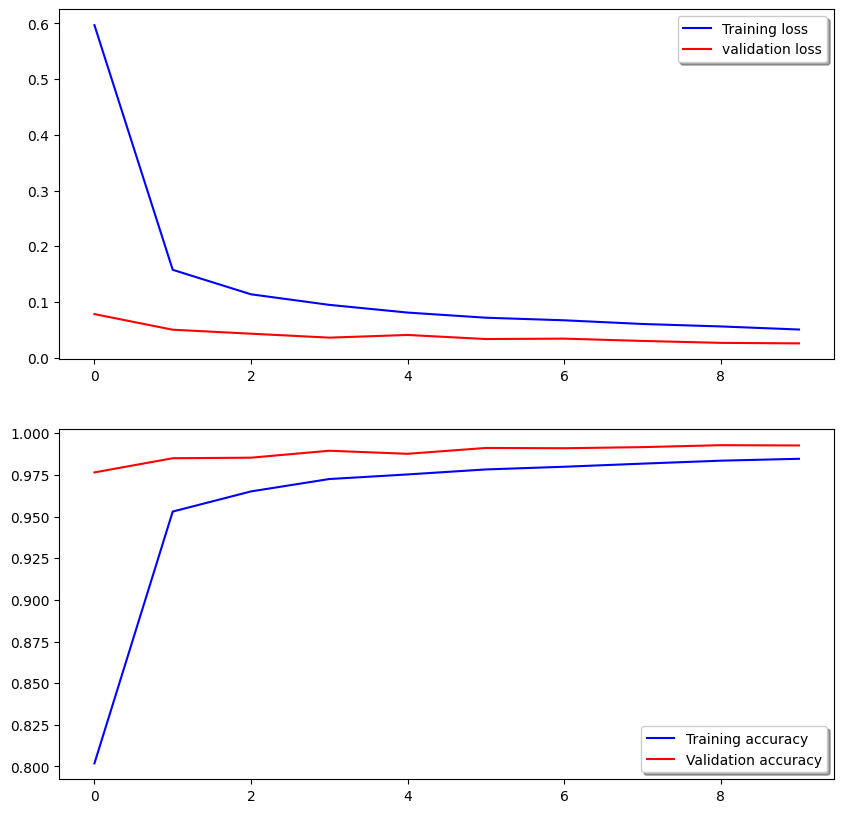

In [38]:
history_dict = history.history
fig, ax = plt.subplots(2,1, figsize=(10, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

## Сохраняем нейронную сеть для последующего использования

In [39]:
model_json = model.to_json()
json_file = open("mnist_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("mnist_model.h5")

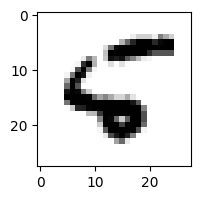

In [40]:
index=8
plt.figure(figsize=(2,2))
plt.imshow(X_test[index], cmap=plt.cm.binary)
plt.show()

In [41]:
x = X_test[index]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)

In [42]:
# Результат предсказания
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 5


In [43]:
# Правильный ответ
print("Название класса:",classes[y_test[index]])

Название класса: 5


## Загружаем свои картинки

**Приложенный архив**

In [44]:
img_path = ['lab6/0.jpg', 'lab6/1.jpg', 'lab6/2.jpg', 'lab6/3.jpg', 'lab6/4.jpg', 'lab6/5.jpg', 'lab6/6.jpg', 'lab6/7.jpg', 'lab6/8.jpg', 'lab6/9.jpg']
images = []
for i in img_path:
        img = image.load_img(i, target_size=(28, 28), color_mode = "grayscale")
        img_copy = img.copy()
        images.append(img_copy)

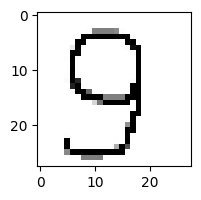

In [45]:
plt.figure(figsize=(2,2))
plt.imshow(images[9].convert('RGBA'))
plt.show()

In [46]:
# Получение предсказаний
pred = []

for i in images:
    x = image.img_to_array(i)
    # Нормализация
    x = 255 - x
    x /= 255
    x = np.expand_dims(x, axis = 0)
    prediction = model.predict(x)
    pred.append(np.argmax(prediction))

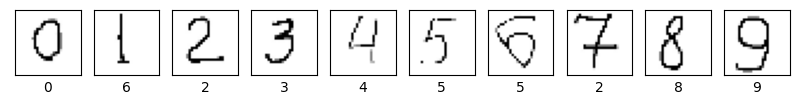

In [47]:
plt.figure(figsize=(10,10))
for k in range(len(pred)):
    plt.subplot(1, 10, k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[k].convert('RGBA'), cmap=plt.cm.binary)
    plt.xlabel(pred[k])

**Свои картинки**

In [48]:
img_path = ['lab6-1/0.jpg', 'lab6-1/1.jpg', 'lab6-1/2.jpg', 'lab6-1/3.jpg', 'lab6-1/4.jpg', 'lab6-1/5.jpg', 'lab6-1/6.jpg', 'lab6-1/7.jpg', 'lab6-1/8.jpg', 'lab6-1/9.jpg']
images = []
for i in img_path:
        img = image.load_img(i, target_size=(28, 28), color_mode = "grayscale")
        img_copy = img.copy()
        images.append(img_copy)

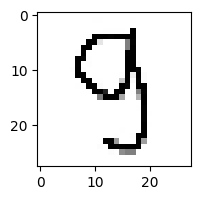

In [49]:
plt.figure(figsize=(2,2))
plt.imshow(images[9].convert('RGBA'))
plt.show()

In [50]:
# Получение предсказаний
pred = []

for i in images:
    x = image.img_to_array(i)
    # Нормализация
    x = 255 - x
    x /= 255
    x = np.expand_dims(x, axis = 0)
    prediction = model.predict(x)
    pred.append(np.argmax(prediction))

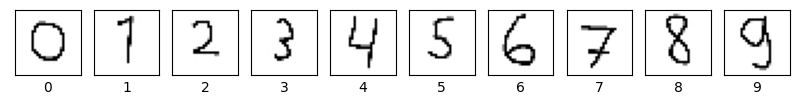

In [51]:
plt.figure(figsize=(10,10))
for k in range(len(pred)):
    plt.subplot(1, 10, k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[k].convert('RGBA'), cmap=plt.cm.binary)
    plt.xlabel(pred[k])

### <span style="color:red"> Сложности возникают с: 1, 6, 7.</span>